Import des librairies nécessaires

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt
from wordcloud import WordCloud as wc

Ici, nous allons étudier les données de la table "top10s.csv", contenant tous les titres ayant été dans le top 10 sur Spotify depuis 2013.

On affiche la table ci dessous afin de déterminer la structure des colonnes et des données dans cette table.

In [2]:
data = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
data.shape

(603, 15)

Ensuite, on execute des commandes génériques afin de voir des données essencielles sur cette table.

In [4]:
data.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [6]:
data.count()

Unnamed: 0    603
title         603
artist        603
top genre     603
year          603
bpm           603
nrgy          603
dnce          603
dB            603
live          603
val           603
dur           603
acous         603
spch          603
pop           603
dtype: int64

Afin d'éviter les problèmes avec le nom des colonnes, on renomme la colonne "top genre" et supprime la colonne "Unnamed: 0", qui représente l'index des données.

In [7]:
data = data.rename(columns={'top genre': 'top_genre'})
data = data.drop('Unnamed: 0', axis=1)
print(data.columns)

Index(['title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


In [9]:
data.head(5)

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Avant de savoir comment analyser les données de la table, nous regardons la table de correlation pour voir quelles données peuvent être liées dans la table.

In [10]:
data.corr()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
spch,0.004778,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490


Pour mieux voir les résultats, on les représente avec des couleurs.

On en profite aussi pour séparer les colonnes entre kes numériques et catégoriques pour pouvoir executer cette commande.

<AxesSubplot:>

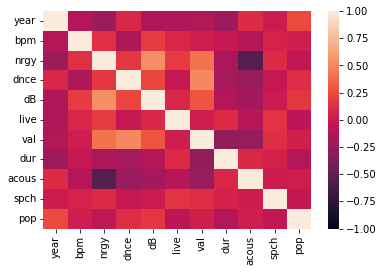

In [15]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns
nrows = data.shape[0]
ncols = data.shape[1]

sns.heatmap(data[numerical_cols].corr(), vmin = -1, vmax = 1)

Enfin, on ajoute les valeurs de la table de correlation pour plus de précision

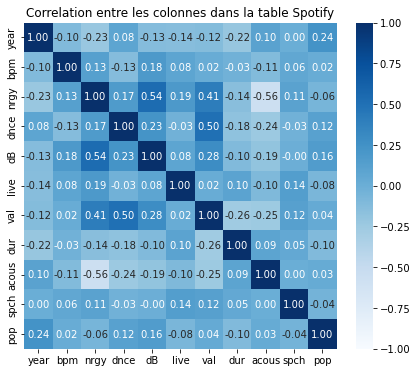

In [21]:
plt.figure(figsize=(7, 6))
sns.heatmap(data[numerical_cols].corr(), annot = True, fmt = '.2f', cmap='Blues', vmin = -1, vmax = 1)
plt.title('Correlation entre les colonnes dans la table Spotify')
plt.show()

On remarque que les colonnes des paramètres ont donnés ces résultats:
 - Acous lié à nrgy (-0.56)
 - Val lié à dnce (0.50)
 - dB lié à nrgy (0.54)

On a ensuite représenté graphiquement ces paramètres entre eux:

Text(0, 0.5, 'Loudness (dB)')

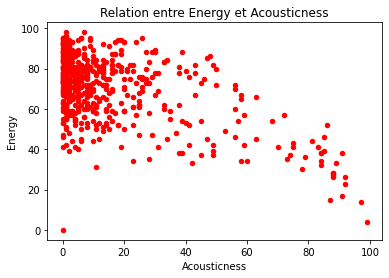

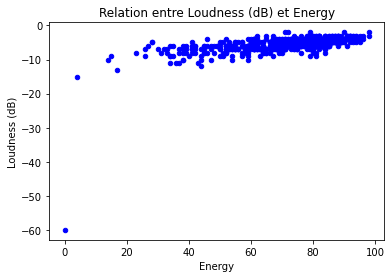

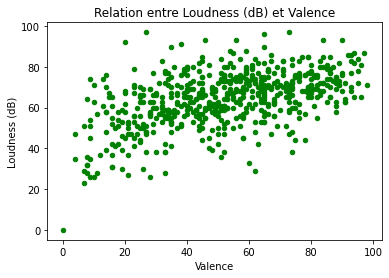

In [23]:
data.plot(x='acous',y='nrgy',kind='scatter', title='Relation entre Energy et Acousticness',color='r')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
data.plot(x='nrgy',y='dB',kind='scatter', title='Relation entre Loudness (dB) et Energy',color='b')
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
data.plot(x='val',y='dnce',kind='scatter', title='Relation entre Loudness (dB) et Valence',color='g')
plt.xlabel('Valence')
plt.ylabel('Loudness (dB)')

On peut maintenant répondre à des problématiques intéressantes par rapport aux données trouvées.

Par example, on peut trouver qui sont les artistes ayant le plus de chansons enregistrés dans la table de données

In [27]:
artists = data['artist'].unique()
len(artists) #Il y a 184 artistes

184

In [28]:
artists = data['artist'].value_counts().reset_index().head(10)
print(artists)

              index  artist
0        Katy Perry      17
1     Justin Bieber      16
2           Rihanna      15
3          Maroon 5      15
4         Lady Gaga      14
5        Bruno Mars      13
6      Shawn Mendes      11
7           Pitbull      11
8        Ed Sheeran      11
9  The Chainsmokers      11


Au vu des résultats de la commande précédente, on remarque que Katy Perry est l'artiste avec le plus de titres enregistrés dans le top 10 de Spotify entre 2010 et 2019

Pour mieux visualiser ces résultats, on fait une représentation graphique:

Text(0.5, 1.0, 'Nombre de titres en haut du classement des Top 10 artistes')

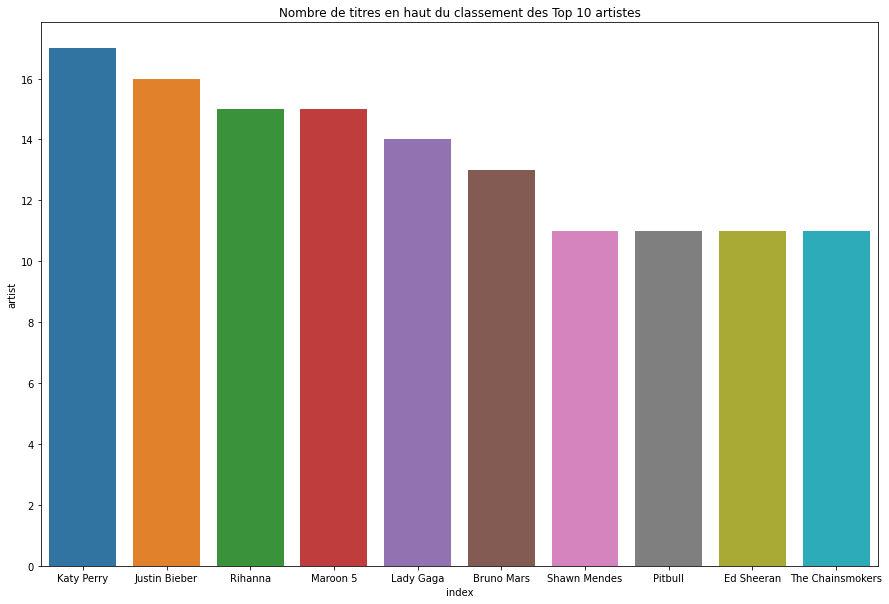

In [30]:
plt.figure(figsize=(15,10))
sn.barplot(x='index',y='artist', data=artists)
plt.title("Nombre de titres en haut du classement des Top 10 artistes")

On peut aussi faire la séparation des titres de chaque artiste par année, comme dans la table ci dessous:

In [32]:
t = []
topArtists = data['artist'].value_counts().head(10).index
for i in topArtists:
     t.append(data[data['artist'] == i])
        
resultArtist = pd.concat(t)
artistsYear = pd.crosstab(resultArtist["artist"],resultArtist["year"],margins=False)
artistsYear

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
artist,,,,,,,,,,
Bruno Mars,2,3,2,0,3,0,0,2,1,0
Ed Sheeran,0,0,0,0,0,4,0,1,1,5
Justin Bieber,1,0,2,1,0,9,2,0,1,0
Katy Perry,2,3,3,1,3,1,1,3,0,0
Lady Gaga,3,5,0,1,1,0,2,1,1,0
Maroon 5,1,1,2,2,1,3,0,1,2,2
Pitbull,0,1,2,2,1,3,0,2,0,0
Rihanna,2,4,3,1,0,2,2,0,1,0
Shawn Mendes,0,0,0,0,0,1,3,2,4,1


On remarque que l'artiste ayant eu l'année avec le plus de ses titres dans le top 10 de Spotify est Justin Bieber en 2015

Une question que l'on peut se poser après voir ces résultats est: Quel a été la progression de chaque artiste au fil des années?

Cette question est difficile à répondre sans représentation graphique, alors voici le graphique correspondant:

C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key 

Text(0.5, 1.0, 'Evolution de chaque artiste dans le Top 10 à travers les années')

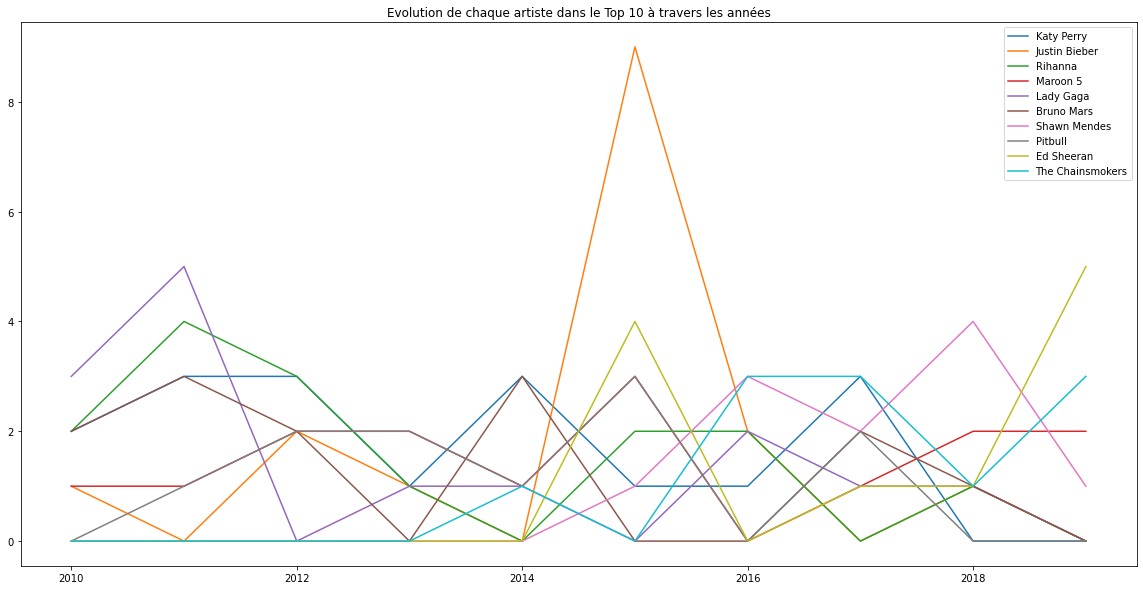

In [34]:
plt.figure(figsize=(20,10))
for i in artists['index']:
  tmp = []
  for y in range(2010,2020):
    songs = data[data['year'] == y][data['artist'] == i]
    tmp.append(songs.shape[0])
  sn.lineplot(x=list(range(2010,2020)),y=tmp)
plt.legend(list(artists['index']))
plt.title("Evolution de chaque artiste dans le Top 10 à travers les années")

<AxesSubplot:ylabel='artist'>

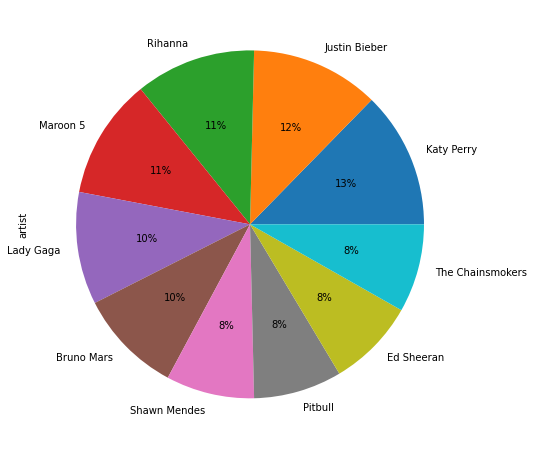

In [35]:
data['artist'].value_counts().head(10).plot.pie(figsize=(8,8), autopct='%1.0f%%')


De ces analyses, on découvre des données intéressantes sur les artistes en question:

Justin Bieber par exemple, bien qu'il fasse partie du Top 10, n'a recu sa position que avec une montée impressionante de popularité entre 2014 et 2016.

Similairement, Lady Gaga est une artiste intéressante: Elle a commencé en 2010-2011 avec entre 3 et 5 titres populaires, mais a baissé fortement jusqu'à 2018-2019, où elle est remontée en popularité. On remarque que cette remontée est fortement influencée par sa chanson dans le film "A Star is Born" à la fin de 2018.

In [36]:
data[data['artist'] == 'Lady Gaga'][data['year'] == 2018]

C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
524,Shallow - Radio Edit,Lady Gaga,dance pop,2018,96,33,57,-7,9,28,217,42,3,80


Une autre question interressante sur ces données serait de voir si des titres réapparaissent plus d'une fois dans le top 10?

Tout d'abord, on regarde la liste des titres qui apparaissent plus d'une fois :

In [37]:
data['title'].value_counts().head(20)>1

A Little Party Never Killed Nobody (All We Got)     True
All I Ask                                           True
Kissing Strangers                                   True
Written in the Stars (feat. Eric Turner)            True
The Hills                                           True
Love Yourself                                       True
We Are Never Ever Getting Back Together             True
Sugar                                               True
Say Something                                       True
First Time                                          True
Stitches                                            True
I Like It                                           True
Hello                                               True
Castle Walls (feat. Christina Aguilera)             True
Company                                             True
Runnin' (Lose It All)                               True
Marry You                                           True
Just the Way You Are           

Ensuite, on les affiche graphiquement :

Text(0.5, 1.0, "Titres apparaissant plus d'une fois")

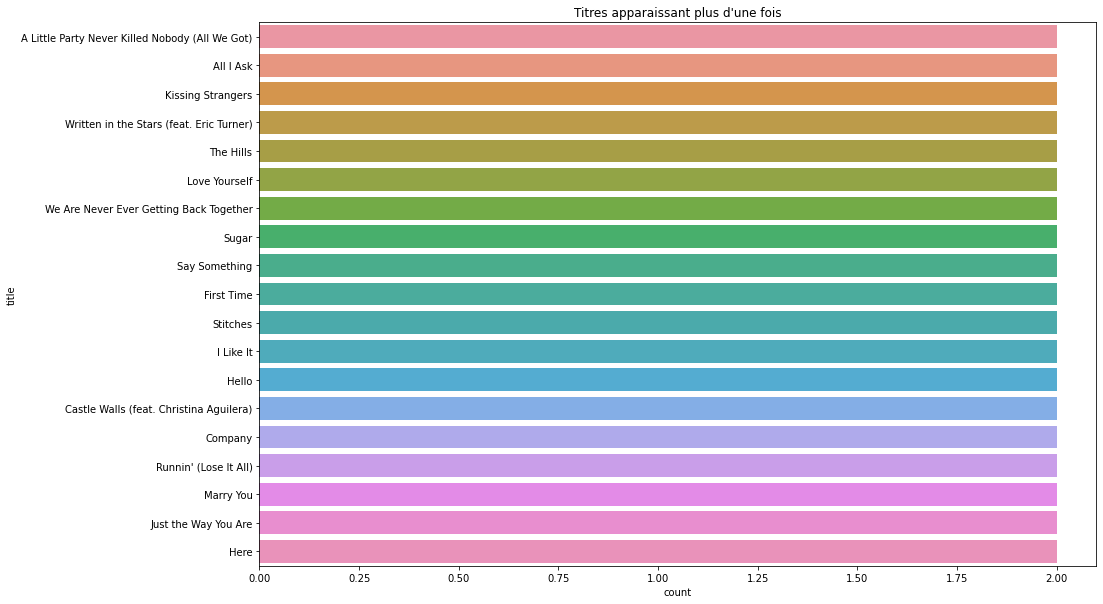

In [38]:
plt.figure(figsize=(15,10))
sn.countplot(y=data.title, order=pd.value_counts(data.title).iloc[:19].index, data=data)
topMusics = data['title'].value_counts().head(19).index
plt.title("Titres apparaissant plus d'une fois")

On cherche ensuite la répartition de ces titres durant les années :

C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key 

Text(0.5, 1.0, "Evolution de chaque titre du top 10 répété plus d'une fois à travers les années")

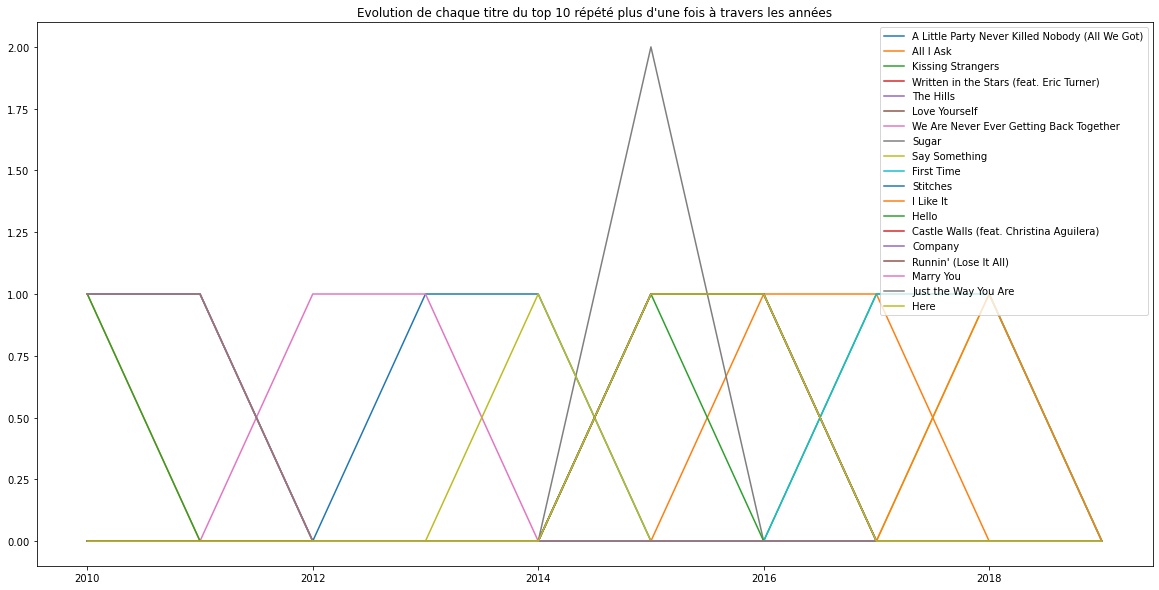

In [40]:
plt.figure(figsize=(20,10))
for i in topMusics:
  tmp = []
  for y in range(2010,2020):
    songs = data[data['year'] == y][data['title'] == i]
    tmp.append(songs.shape[0])
  sn.lineplot(x=list(range(2010,2020)),y=tmp)
plt.legend(list(topMusics))
plt.title("Evolution de chaque titre du top 10 répété plus d'une fois à travers les années")

On remarque que le titre "Sugar" de Maroon 5 est revenu 2 fois durant la même année

In [42]:
data[data['title']== 'Sugar']

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
274,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,81
322,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66


On a trouvé intéressant de voir quels sont les 15 titres les plus populaires dans la table de données

In [43]:
data.sort_values(by=['pop'], ascending=False).head(15)

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
578,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
580,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90
579,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90


On découvre que la plupart des titres sont de 2019, avec une majorité de chansons du genre pop


On retrouve en dessous les titres les plus longs, puis les titres avec la plus forte présence accoustique

In [44]:
data.sort_values(by=['dur'], ascending=False).head(15)

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
188,TKO,Justin Timberlake,dance pop,2013,138,68,61,-7,43,49,424,1,24,58
422,Wish That You Were Here - From Miss Peregrine...,Florence + The Machine,art pop,2016,94,57,37,-6,13,12,403,72,3,57
63,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73
162,Lose Yourself to Dance,Daft Punk,electro,2013,100,66,83,-8,8,67,354,8,6,72
194,Take Back the Night,Justin Timberlake,dance pop,2013,107,66,59,-5,64,33,353,4,16,54
543,Sign of the Times,Harry Styles,dance pop,2018,120,57,52,-5,11,21,341,3,3,72
48,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
95,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
172,Suit & Tie,Justin Timberlake,dance pop,2013,102,60,80,-4,16,36,326,10,22,68
256,Drunk in Love,Beyoncé,dance pop,2014,140,62,59,-7,18,40,323,1,5,52


In [45]:
data.sort_values(by=['acous'], ascending=False).head(15)

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
431,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47
255,Not About Angels,Birdy,neo mellow,2014,116,14,41,-10,9,23,190,97,4,56
186,Clown,Emeli Sandé,dance pop,2013,130,23,45,-8,11,23,221,92,4,60
210,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
96,Turning Page,Sleeping At Last,acoustic pop,2011,125,38,30,-8,11,19,255,91,3,46
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36
52,Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,285,89,3,80
330,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,17,52,134,88,3,63
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80
398,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71


On en revient à une autre problématique intéressante:
Lequel des 10 genres musicaux les plus connus dans la table de données est le plus populaire ?

In [47]:
genres = data['top_genre'].value_counts().reset_index().head(10)

<AxesSubplot:xlabel='index', ylabel='top_genre'>

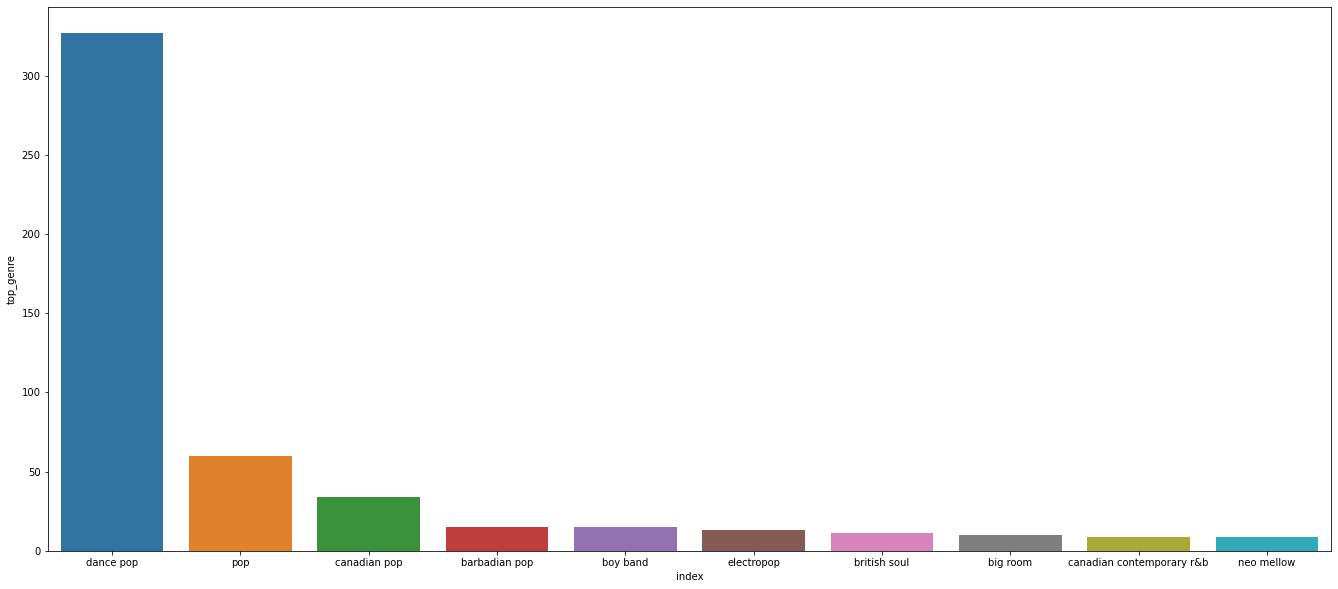

In [48]:
plt.figure(figsize=(23,10))
sn.barplot(x='index',y='top_genre', data=genres)

On remarque que le genre de Dance Pop est de loin le plus populaire, avec plus de 300 titres.

Pour comparaison, le 2eme genre le plus populaire est Pop, avec un peu plus de 50 titres.

<AxesSubplot:ylabel='top_genre'>

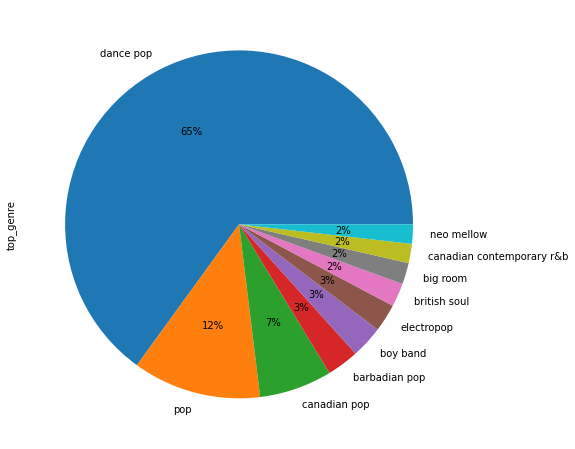

In [50]:
data['top_genre'].value_counts().head(10).plot.pie(figsize=(8,8), autopct='%1.0f%%')

C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\jadsa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key 

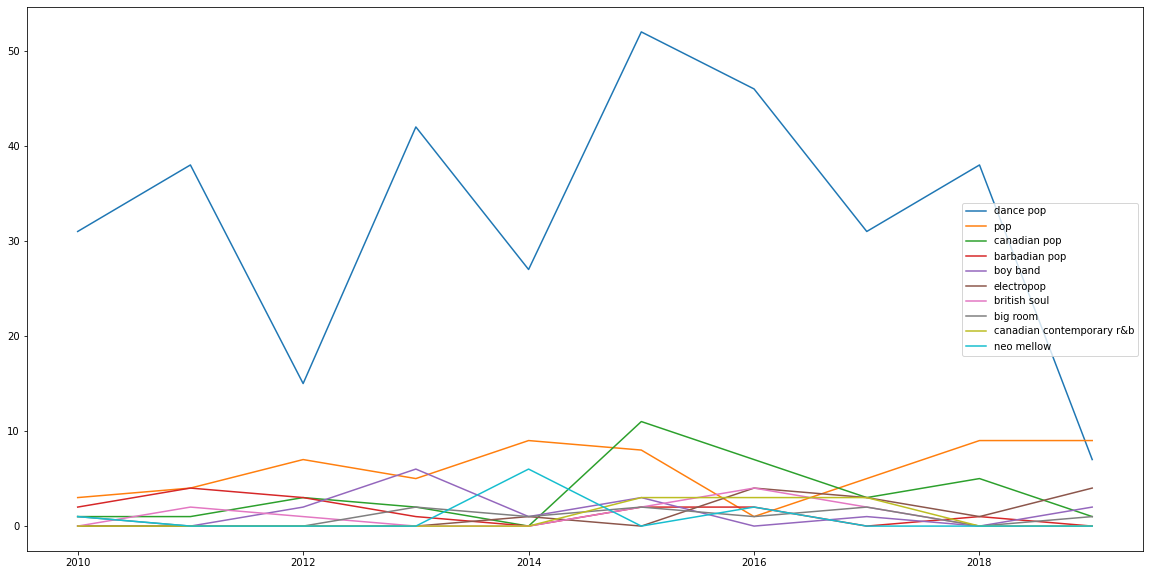

In [51]:
plt.figure(figsize=(20,10))
for i in genres['index']:
  tmp = []
  for y in range(2010,2020):
    songs = data[data['year'] == y][data['top_genre'] == i]
    tmp.append(songs.shape[0])
  sn.lineplot(x=list(range(2010,2020)),y=tmp)
plt.legend(list(genres['index']))

On souhaite voir d'où viennent les artistes les plus populaires dans le top 10 des artistes de Spotify

In [52]:
artists

,index,artist
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Shawn Mendes,11
7,Pitbull,11
8,Ed Sheeran,11
9,The Chainsmokers,11


Vu que cette donnée ne vient pas de notre table, on entre les données manuellement

In [54]:
dicArtists = {
    'Katy Perry':"Santa Barbara",
    'Justin Bieber':"London Canada",
     'Rihanna':"Saint Michael",
    'Maroon 5':"Los Angeles",
    'Lady Gaga':"Manhattan",
    'Bruno Mars':"Honolulu", 
    'The Chainsmokers':"Times Square" ,
    'Pitbull':"Miami",
    'Shawn Mendes':"Toronto",
    'Ed Sheeran':"United Kingdom", 
  }

On définit les coordonnées en longitude et lattitude

In [57]:
import geocoder
listGeo = []

for value in (dicArtists.values()):
    g = geocoder.arcgis(value)
    listGeo.append(g.latlng)

In [58]:
top_genres =[]
for key in (dicArtists.keys()):
    top_genres.append(data[data['artist']== key].top_genre.unique())

In [59]:
lat = []
log = []
for i in listGeo:
    lat.append(i[0])
    log.append(i[1])

In [61]:
colors = {
 'dance pop': 'pink',
 'pop': 'blue',
 'barbadian pop': 'green',
 'electropop': 'orange',
 'canadian pop': 'red',
}

Après les avoir définit, voila les coordonnées des artistes sélectionnés :

In [62]:
dfLocation = pd.DataFrame(columns=['Name','Lat','Log','Gen'])
dfLocation['Name'] = artists['index']
dfLocation['Gen']  = np.array(top_genres)
dfLocation['Lat']  = lat
dfLocation['Log']  = log
dfLocation

,Name,Lat,Log,Gen
0,Katy Perry,34.419380,-119.699050,dance pop
1,Justin Bieber,42.988148,-81.246092,canadian pop
2,Rihanna,13.105320,-59.611420,barbadian pop
3,Maroon 5,34.053570,-118.245450,pop
4,Lady Gaga,40.714500,-74.006010,dance pop
5,Bruno Mars,21.304930,-157.857880,pop
6,Shawn Mendes,40.756480,-73.986180,electropop
7,Pitbull,25.774810,-80.197730,dance pop
8,Ed Sheeran,43.653524,-79.383907,canadian pop
9,The Chainsmokers,53.408387,-1.969560,pop


On modélise une carte via folium (qui utilise Google Maps) pour représenter les zones correspondantes

In [64]:
spotify = folium.Map(
    location=[41.5503200,-8.4200500],
    zoom_start=2
)
spotify

Enfin, on affiche les artistes dans leur coordonnées sur cette carte

In [65]:
for i in range(10):
    singer = dfLocation.iloc[i]
    folium.Marker(
        
        popup=singer['Name']+'-'+singer['Gen'],
        location=[singer['Lat'], singer['Log']],
    icon=folium.Icon(color=colors[singer['Gen']], icon='music')).add_to(spotify)
    
spotify

En se servant de la heat map, on peut définir les zones qui concentrent le plus d'artistes :


In [66]:
spotify = folium.Map(
    location=[41.5503200,-8.4200500],# Coordenadas retiradas do Google Maps
    zoom_start=2
)

HeatMap(list(zip(lat, log))).add_to(spotify)
spotify